## DS 3001 Project

Team: Cool Team

Group members: Cindy Dong, Herin Seo, Joseph Choe, Allie Kim, Aidan Tan, David Bae, Ben Yeh, Jonah Lee

### 1. State a clear prediction question, not just what you did. Asking clear questions is the key to getting clear answers. You don't need to pick a "client", but sometimes it's helpful to think about the hypothetical scenario in which, say, NOAA or FEMA or a hospital would use your model.

### **Given various patterns in crime types, area name, and time occurred, how can we predict high-risk situations to help individuals avoid dangerous areas and make informed safety decisions?**

In [8]:
# Cleaned up data
import pandas as pd

file_path = 'Crime_Data_from_2020_to_Present.csv'
df = pd.read_csv(file_path)

def categorize_crime(crime_desc):
    categories = {
        'Theft': ['theft', 'stolen', 'pickpocket'],
        'Sexual Offense': ['rape', 'sex', 'lewd', 'exposure'],
        'Court Issued Violation': ['court', 'restraining'],
        'Burglary': ['burglary'],
        'Murder': ['murder', 'homicide'],
        'Assault': ['assault'],
        'Vandalism': ['vandalism'],
        'Robbery': ['robbery'],
        'Trespassing': ['trespassing'],
        'Battery': ['battery'],
        'Criminal Threat': ['threat', 'brandish']
    }
    
    crime_desc_lower = crime_desc.lower()
    
    for category, keywords in categories.items():
        if any(keyword in crime_desc_lower for keyword in keywords):
            return category
    
    return 'Other'

df['Crime Category'] = df['Crm Cd Desc'].apply(categorize_crime)

df[df['Crime Category'] == 'Other']['Crm Cd Desc'].value_counts().head(20)

Crm Cd Desc
OTHER MISCELLANEOUS CRIME                                   6870
DISCHARGE FIREARMS/SHOTS FIRED                              2651
ARSON                                                       2531
EXTORTION                                                   1987
CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)    1796
FAILURE TO YIELD                                            1677
SHOTS FIRED AT INHABITED DWELLING                           1635
DISTURBING THE PEACE                                        1497
CHILD NEGLECT (SEE 300 W.I.C.)                              1178
CHILD ANNOYING (17YRS & UNDER)                              1037
RESISTING ARREST                                            1033
KIDNAPPING                                                   799
THROWING OBJECT AT MOVING VEHICLE                            788
ORAL COPULATION                                              715
STALKING                                                     636
UNAUTHORIZED 

<Figure size 1200x600 with 0 Axes>

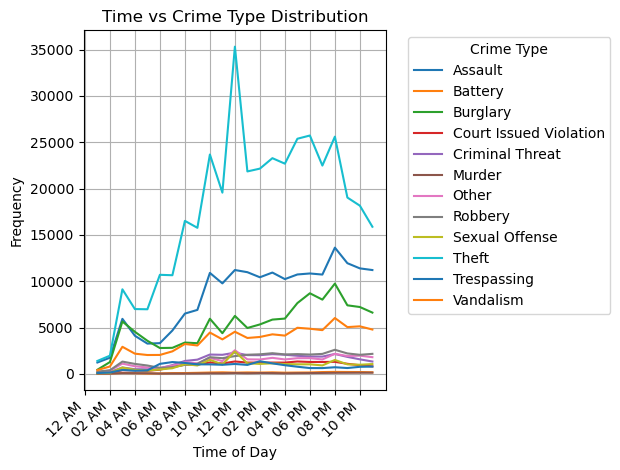

In [9]:
# Graph 1

import matplotlib.pyplot as plt
import pandas as pd

crime_time = df.groupby(['TIME OCC', 'Crime Category']).size().unstack()


df['TIME OCC'] = pd.to_datetime(df['TIME OCC'], format='%H%M', errors='coerce').dt.strftime('%I %p')
crime_time = df.groupby(['TIME OCC', 'Crime Category']).size().unstack()


crime_time = crime_time.reindex(pd.date_range(start='00:00', end='23:59', freq='h').strftime('%I %p'))


plt.figure(figsize=(12, 6))
crime_time.plot(kind='line')

plt.title('Time vs Crime Type Distribution')
plt.xlabel('Time of Day')
plt.ylabel('Frequency')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.xticks(range(0, 24, 2), crime_time.index[::2], rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### The graph above depicts a line graph analyzing crime type and how frequent that crime type is at a specific time of the day. In this graph, our algorithm uses the cleaned data with crime type sorted into 12 categories. The most prominent finding is that theft is the most frequently occurring crime, followed by trespassing, then burglary as the top 3. We can also see that for the top crime, theft, it most commonly occurs at 12PM, mid-day. There is also an overall trend of crime generally increasing in frequency as the day progresses from morning to night (12AM to 12PM).

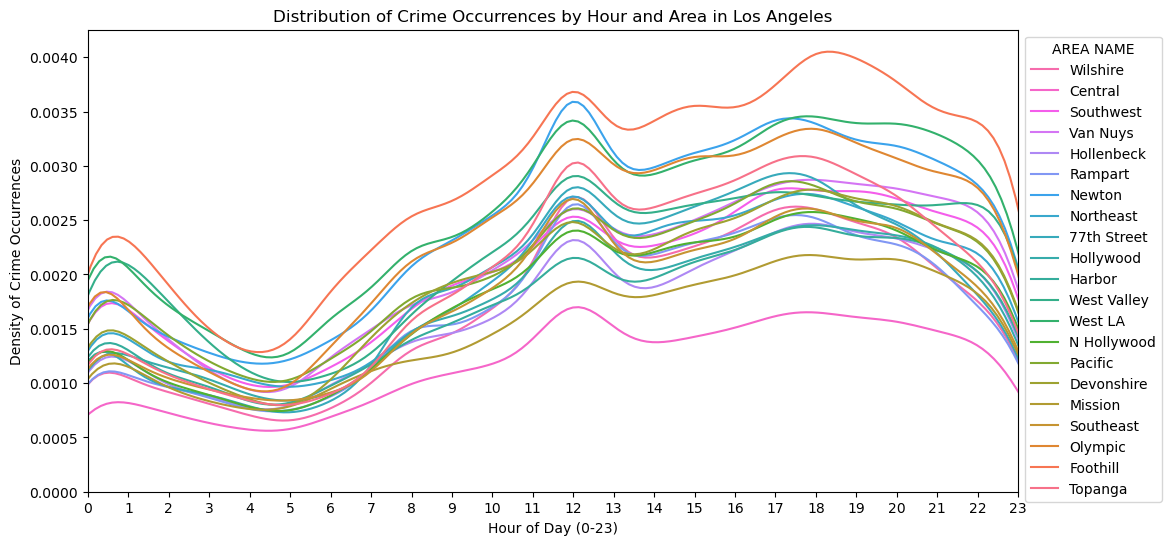

In [13]:
# Graph 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'Crime_Data_from_2020_to_Present.csv'
df = pd.read_csv(file_path)

def categorize_crime(crime_desc):
    categories = {
        'Theft': ['theft', 'stolen', 'pickpocket'],
        'Sexual Offense': ['rape', 'sex', 'lewd', 'exposure'],
        'Court Issued Violation': ['court', 'restraining'],
        'Burglary': ['burglary'],
        'Murder': ['murder', 'homicide'],
        'Assault': ['assault'],
        'Vandalism': ['vandalism'],
        'Robbery': ['robbery'],
        'Trespassing': ['trespassing'],
        'Battery': ['battery'],
        'Criminal Threat': ['threat', 'brandish']
    }
    
    crime_desc_lower = crime_desc.lower()
    
    for category, keywords in categories.items():
        if any(keyword in crime_desc_lower for keyword in keywords):
            return category
    
    return 'Other'

df['Crime Category'] = df['Crm Cd Desc'].apply(categorize_crime)

df[df['Crime Category'] == 'Other']['Crm Cd Desc'].value_counts().head(20)

df['Hour'] = df['TIME OCC'].astype(str).str.zfill(4).str[:2].astype(int)

plt.figure(figsize=(12, 6))
graph = sns.kdeplot(data=df, x='Hour', hue='AREA NAME')
unique_hues = df['AREA NAME'].unique()
graph.legend(title='AREA NAME', labels=unique_hues, loc='upper left', bbox_to_anchor=(1, 1))


plt.title("Distribution of Crime Occurrences by Hour and Area in Los Angeles")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Density of Crime Occurrences")

plt.xticks(np.arange(0, 24, 1))  
plt.xlim(0, 23)

plt.show()

#### The graph above presents a kernel density estimation (KDE) plot that illustrates the distribution of crime occurrences by hour and density of crime occurrences in Los Angeles, based on a processed dataset of crime incidents. The x-axis represents the 24 hours of the day, while the y-axis shows the density of crime occurrences, with different colored lines indicating various areas. Key observations reveal a general decrease in crime density from 1 AM to 5 AM, followed by a significant increase from 5 AM to 11 AM, culminating in a sharp jump at 11 AM. After this peak, there is a noticeable decrease in density from 12 PM to 1 PM; however, crime rates remain relatively high throughout the afternoon and early evening until around 10 PM to 11 PM, where a visible drop occurs. This pattern highlights distinct temporal trends in criminal activity, with certain hours exhibiting higher densities that could inform targeted law enforcement strategies. Overall, this KDE plot serves as an insightful tool for understanding the complex dynamics of crime occurrences across different times of day in Los Angeles.

/var/folders/kb/p5lp3qzx7nz_w5l11lgt2ktm0000gn/T/ipykernel_28167/2242540763.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['TIME OCC'] = df_subset['TIME OCC'].apply(lambda x: str(x).zfill(4))
/var/folders/kb/p5lp3qzx7nz_w5l11lgt2ktm0000gn/T/ipykernel_28167/2242540763.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Hour'] = df_subset['TIME OCC'].str[:2].astype(int)


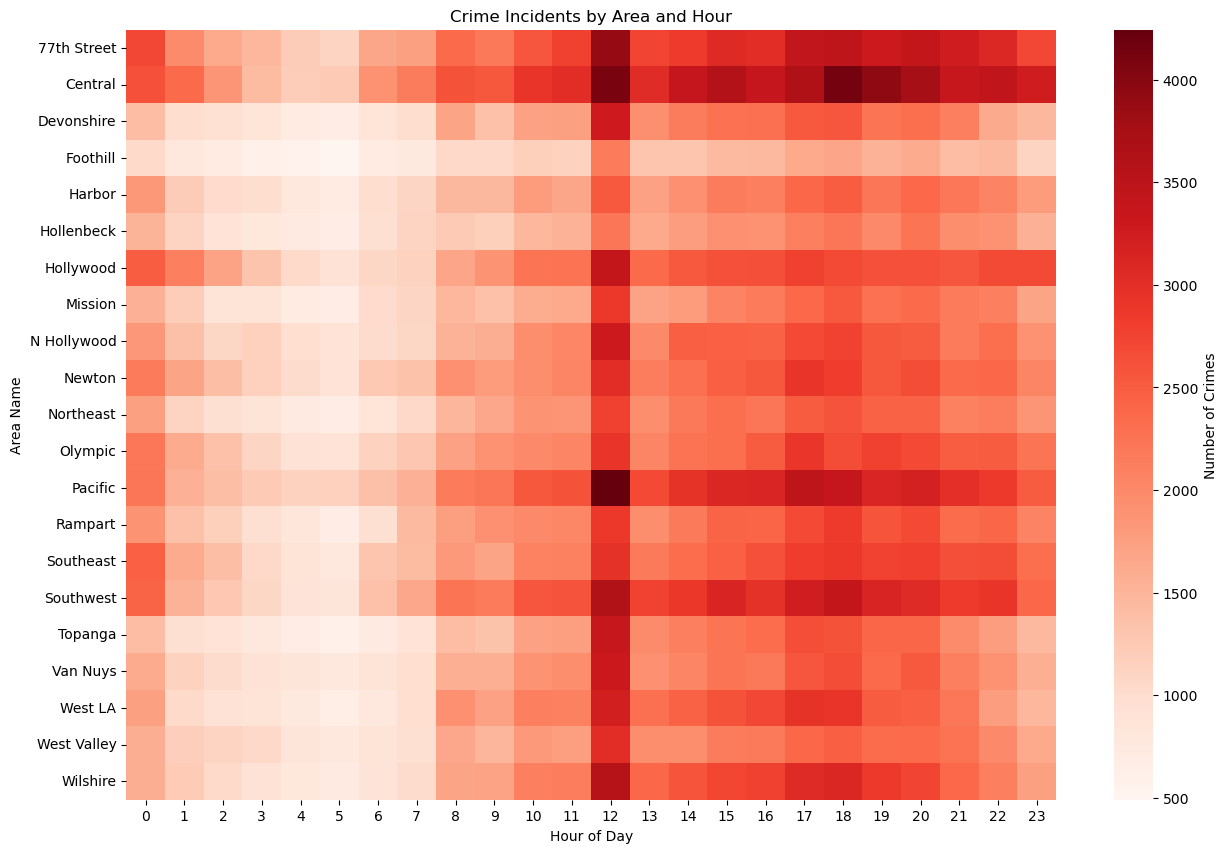

In [11]:
# Graph 3

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

url = 'Crime_Data_from_2020_to_Present.csv'
df = pd.read_csv(url, sep=',')


df['AREA'].fillna('Unknown', inplace=True)
df['TIME OCC'].fillna('Unknown', inplace=True)
df['Vict Age'].fillna(df['Vict Age'].mode()[0], inplace=True)

df_subset = df[['AREA NAME', 'TIME OCC', 'Crm Cd Desc']]

df_subset['TIME OCC'] = df_subset['TIME OCC'].apply(lambda x: str(x).zfill(4))
df_subset['Hour'] = df_subset['TIME OCC'].str[:2].astype(int)

heatmap_df = df_subset.groupby(['AREA NAME', 'Hour']).size().unstack(fill_value=0)

plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_df, cmap="Reds", annot=False, fmt="d", cbar_kws={'label': 'Number of Crimes'})
plt.title("Crime Incidents by Area and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Area Name")
plt.show()

#### The graph above presents a heatmap visualizing the frequency of crime incidents across different areas of Los Angeles and hours of the day. This visualization is based on our cleaned and processed dataset, which includes information on crime locations and times of occurrence. The heatmap uses a color gradient from light to dark red to represent the number of crimes, with darker shades indicating a higher frequency of incidents. The x-axis represents the 24 hours of the day, while the y-axis lists the various areas within Los Angeles.

#### One of the most striking observations from this heatmap is the variation in crime patterns across different areas and times. Some areas appear to have consistently higher crime rates throughout the day like Pacific and Central, as indicated by darker red blocks across their rows. Conversely, other areas show lower overall crime rates, represented by lighter shades. There's a noticeable trend in the temporal distribution of crimes. Many areas seem to experience an increase in criminal activity during noon through late afternoon and into the evening hours, as evidenced by the darker shades in the right half of the heatmap. This could suggest that certain types of crimes are more likely to occur during these times. Additionally, we can observe some 'hotspots' where certain areas at specific times show particularly high crime rates, represented by the darkest red squares. These hotspots could be valuable for law enforcement to target their resources more effectively.



Accuracy: 47.24%


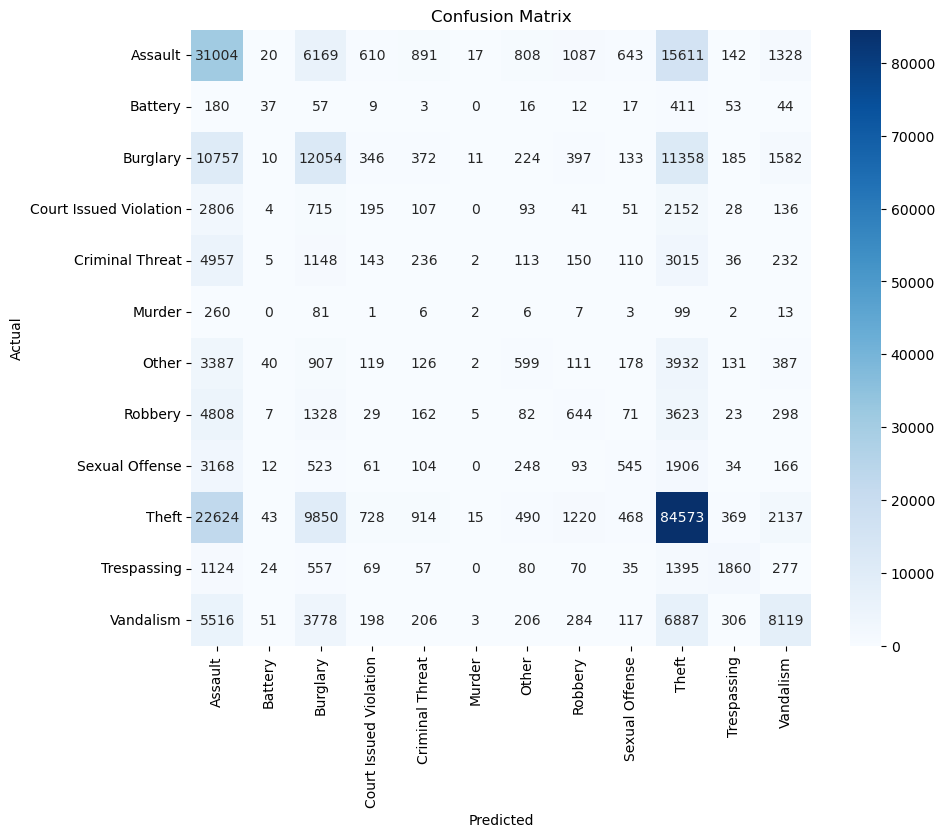

In [12]:
# Graph 4
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA


file_path = 'Crime_Data_from_2020_to_Present.csv'
df = pd.read_csv(file_path)

def categorize_crime(crime_desc):
    categories = {
        'Theft': ['theft', 'stolen', 'pickpocket'],
        'Sexual Offense': ['rape', 'sex', 'lewd', 'exposure'],
        'Court Issued Violation': ['court', 'restraining'],
        'Burglary': ['burglary'],
        'Murder': ['murder', 'homicide'],
        'Assault': ['assault'],
        'Vandalism': ['vandalism'],
        'Robbery': ['robbery'],
        'Trespassing': ['trespassing'],
        'Battery': ['battery'],
        'Criminal Threat': ['threat', 'brandish']
    }
    
    crime_desc_lower = crime_desc.lower()
    
    for category, keywords in categories.items():
        if any(keyword in crime_desc_lower for keyword in keywords):
            return category
    
    return 'Other'

df['Crime Category'] = df['Crm Cd Desc'].apply(categorize_crime)

df[df['Crime Category'] == 'Other']['Crm Cd Desc'].value_counts().head(20)

df['Hour'] = df['TIME OCC'].astype(str).str.zfill(4).str[:2] + '00'

features = ['Vict Age', 'Premis Desc', 'Hour']
X = df[features]

X = pd.get_dummies(X, drop_first=True)

y = df['Crime Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pca = PCA(n_components=min(X_train.shape[0], X_train.shape[1]))

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)

y_pred = knn.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#### Overall, the model performs well in predicting certain types of crimes, with the highest number of true positive predictions for Theft. Assault and Burglary also have relatively high accuracy, suggesting that these crimes were predicted fairly well. However, the model struggles with less common or more nuanced categories such as Murder, Criminal Threats, and Sexual Offenses, which shows a low number of true positives, indicating difficulty in accurately classifying these instances. Common misclassifications include Burglary being predicted as Theft and Robbery being misclassified as Other, suggesting that these crime types share similarities in their features or descriptions, which may lead to confusion. Overall, while the model effectively identifies some crime categories, it struggles in differentiating between categories with overlapping characteristics and enhancing predictions for less frequently occurring crimes.